My original nb for lesson 1.2 (9/15) did not save, so only challenge question 1 shows up.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [ ]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0,T,N)
#t = numpy.arange(0.0, T+dt, dt)

Challenge Question 1 ^

In [3]:
z0 = 100
b0 = 10
zt = 100
g = 9.81
u = numpy.array([z0,b0])
z = numpy.zeros(N)
z[0] = z0

In [4]:
for n in range (1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

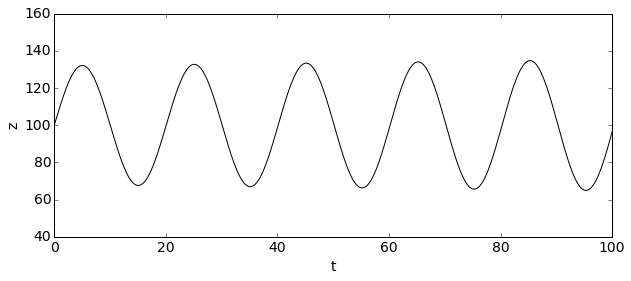

In [5]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');

In [6]:
z_exact = b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t)+\
(z0-zt)*numpy.cos((g/zt)**0.5*t)+zt

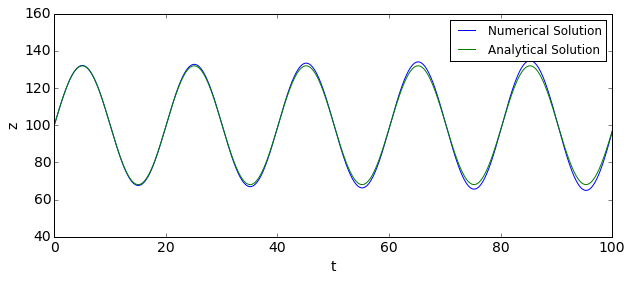

In [7]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);


In [8]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0, T, N)
    u = numpy.array([z0,b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    for n in range(1,N):
        u = u+dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
        
    z_values[i] = z.copy()

In [9]:
def get_error(z,dt):
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    z_exact = b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t)+\
    (z0-zt)*numpy.cos((g/zt)**0.5*t)+zt
    return dt*numpy.sum(numpy.abs(z-z_exact))

In [10]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

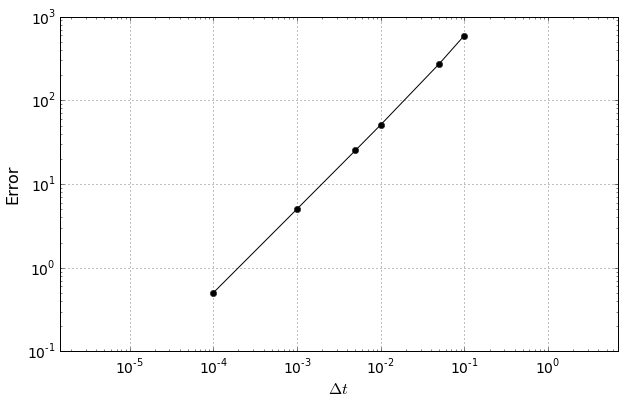

In [11]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;


________________________________________________________________
Challenge Q 2: Euler function embedded into error analysis

In [14]:
def Euler_Method(): #not defining any variables since they are already set above
    u = numpy.array([z0,b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    for n in range(1,N):
        u = u+dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
    return z

In [16]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)
    Euler_Method()
    z_values[i] = z.copy()

error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

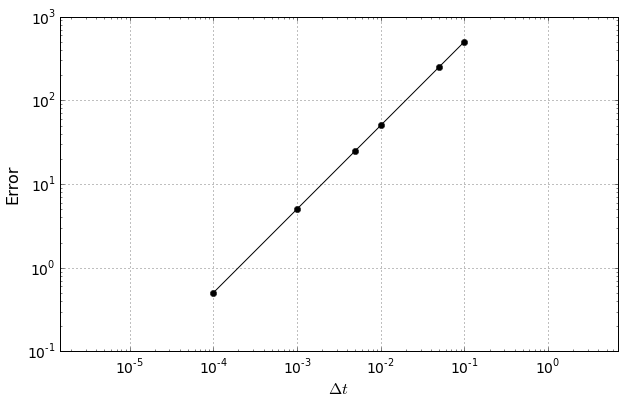

In [17]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')  